## Multiple Linear Regression and Regression Error Metrics

## Import library

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [82]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Preparation

In [83]:
df.shape

(200, 4)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [85]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [86]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115]))

111.25
7.39509972887452


In [87]:
print(np.mean([100, 110, 120, 700]))
print(np.std([100, 110, 120, 700]))

257.5
255.57533136044253


In [88]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

307.5
342.153109002388


## Distribution of features

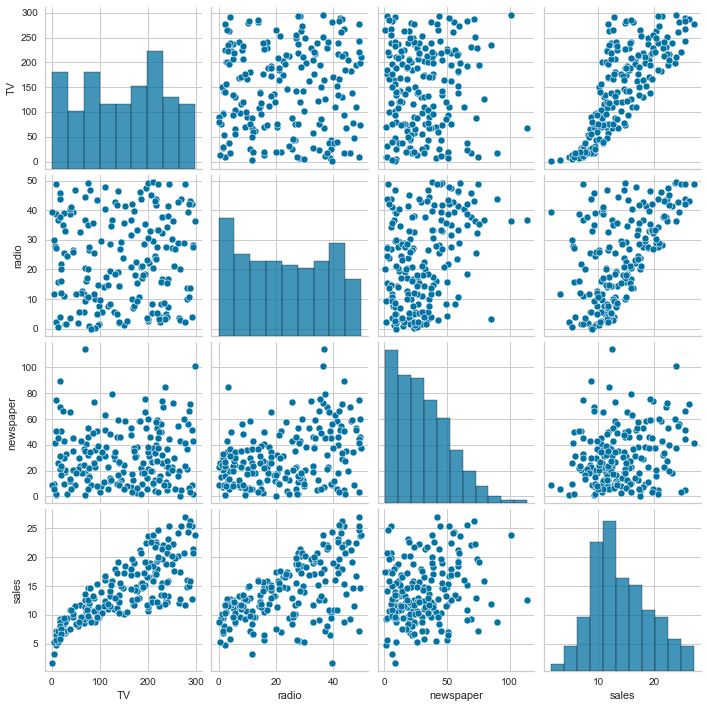

In [89]:
sns.pairplot(df);

In [90]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

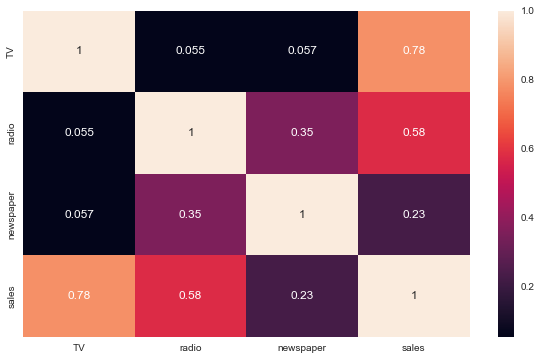

In [91]:
sns.heatmap(df.corr(), annot = True)

## Train-Test Split

In [92]:
X = df.drop(columns ="sales") #df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [95]:
df.sample(15)

,TV,radio,newspaper,sales
126,7.8,38.9,50.6,6.6
59,210.7,29.5,9.3,18.4
87,110.7,40.6,63.2,16.0
34,95.7,1.4,7.4,9.5
72,26.8,33.0,19.3,8.8
116,139.2,14.3,25.6,12.2
17,281.4,39.6,55.8,24.4
151,121.0,8.4,48.7,11.6
139,184.9,43.9,1.7,20.7
5,8.7,48.9,75.0,7.2


In [96]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (140, 3)
Train target shape   :  (140,)
Test features shape  :  (60, 3)
Test target shape    :  (60,)


In [97]:
X_train.shape, X_train.head()

((140, 3),
         TV  radio  newspaper
 169  284.3   10.6        6.4
 97   184.9   21.0       22.0
 31   112.9   17.4       38.6
 12    23.8   35.1       65.9
 35   290.7    4.1        8.5)

In [98]:
X_test.shape, X_test.head()

((60, 3),
         TV  radio  newspaper
 95   163.3   31.6       52.9
 15   195.4   47.7       52.9
 30   292.9   28.3       43.2
 158   11.7   36.9       45.2
 128  220.3   49.0        3.2)

In [99]:
y_train.head()

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
Name: sales, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [21]:
from sklearn.linear_model import LinearRegression

In [100]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [115]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [116]:
model.intercept_

2.7089490925159048

In [118]:
# y_pred = b3 * TV + b2 * radio + b3 * newspaper + b0

In [120]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

16.565396297434837

In [121]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [122]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [123]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


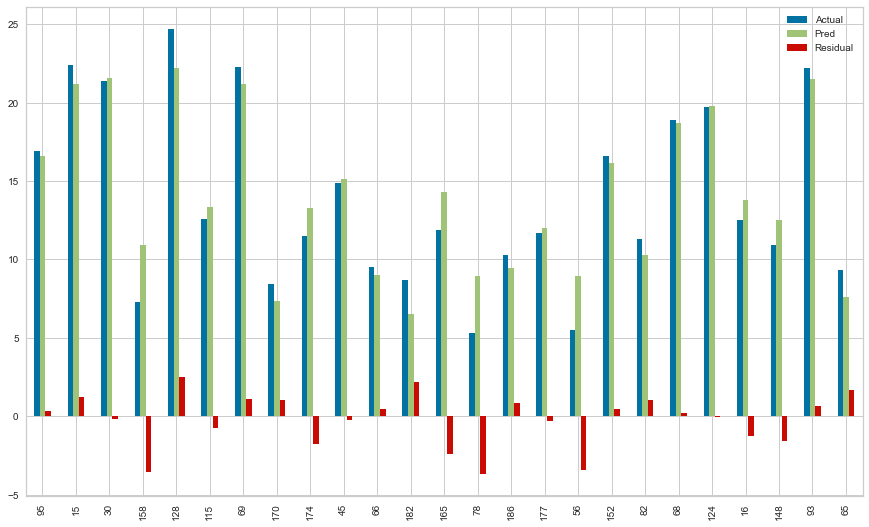

In [124]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

## Error Metrics

In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [128]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8609466508230369

In [129]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549086

In [130]:
mse = mean_squared_error(y_test, y_pred)
mse

3.796797236715217

In [131]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446378

In [132]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [133]:
mae / sales_mean

0.10780311802138766

In [134]:
rmse / sales_mean

0.1389579036794179

## Adjusted R2 score 

https://towardsdatascience.com/demystifying-r-squared-and-adjusted-r-squared-52903c006a60

In [135]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [136]:
adj_r2(y_test, y_pred, df)

0.8588182832335935

## What is the concept of punishment for RMSE error metric?

In [137]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5800]}

In [138]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5800


In [139]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

In [140]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5800,800


In [141]:
#mae
df_2.residual.sum()/5 #200

300.0

In [142]:
#rmse
((df_2.residual**2).sum()/5)**0.5 #209.76

392.42833740697165

## Evaluation Model

In [143]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [144]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8609466508230369
MAE 		: 1.5116692224549086
MSE 		: 3.796797236715217
RMSE 		: 1.9485372043446378


In [145]:
y_train_pred = model.predict(X_train)

In [146]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072528
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


## Is data suitable for linear regression?

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

## Plotting residuals

In [147]:
residuals = y_test-y_pred

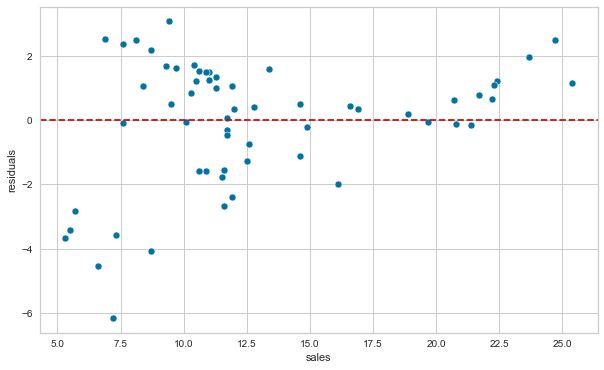

In [148]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

<AxesSubplot:xlabel='sales', ylabel='Density'>

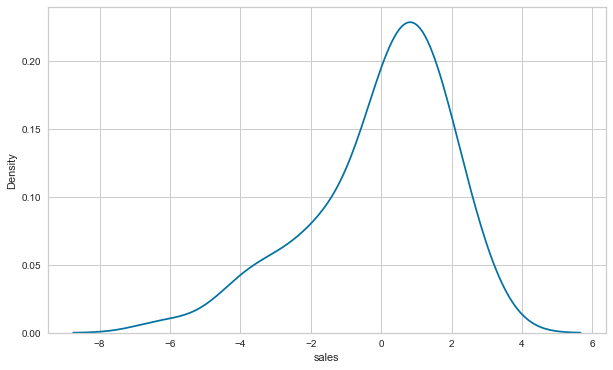

In [149]:
sns.kdeplot(residuals)

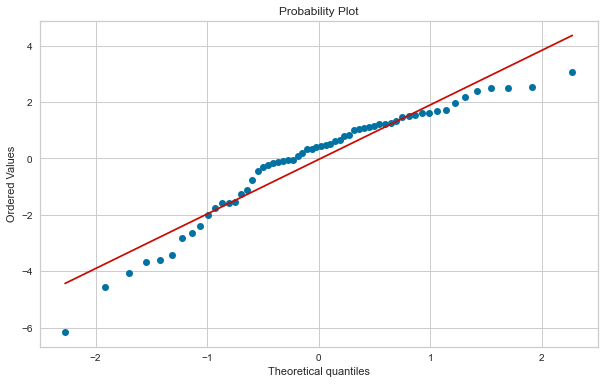

In [150]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [151]:
from scipy.stats import skew
skew(residuals)

-0.9865673346742722

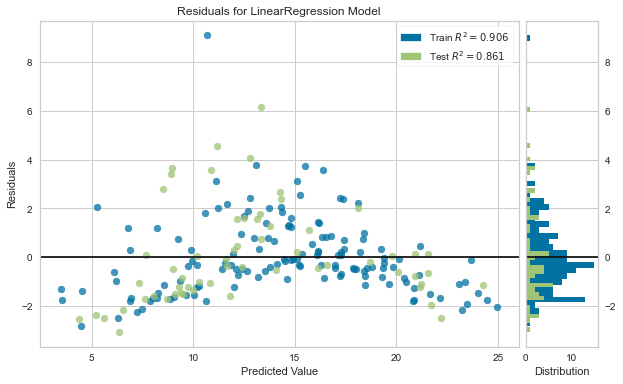

In [152]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

## Prediction Error for LinearRegression

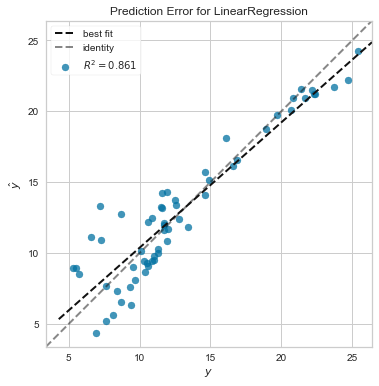

In [153]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

## Retraining Model on Full Data

In [156]:
final_model = LinearRegression()

In [157]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [158]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [159]:
final_model.intercept_

2.9388893694594067

In [160]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [161]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [162]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [163]:
adv = [[150, 20, 15]]

In [164]:
adv

[[150, 20, 15]]

In [165]:
final_model.predict(adv)

array([13.55862413])

In [166]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [167]:
final_model.intercept_

2.9388893694594067

In [168]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_

13.558624130495994

In [169]:
adv_2 = [[150, 20, 15], [160, 20, 15]]

In [170]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [171]:
14.01627059 - 13.55862413

0.4576464599999994

## The effect of features on the predicted label

In [172]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [173]:
coeff_df.Coefficient * adv[0]

TV           6.864697
radio        3.770600
newspaper   -0.015562
Name: Coefficient, dtype: float64

In [174]:
6.864697 / 13.55862413

0.5062974630892729

In [175]:
3.770600 / 13.55862413

0.2780960637191142

In [176]:
-0.015562 / 13.55862413

-0.0011477565755043907